# Import Module

In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold

import os
import warnings
warnings.filterwarnings('ignore')
print(os.listdir('../dataset/preprocessing'))

['Preprocess_test.csv', 'Preprocess_train.csv', 'test.csv', 'train.csv']


# Load Dataset

In [44]:
IMPORT_PATH = '../dataset/preprocessing/'

In [45]:
train = pd.read_csv(IMPORT_PATH + 'Preprocess_train.csv')
test = pd.read_csv(IMPORT_PATH + 'Preprocess_test.csv')

# Check Dataset

In [46]:
print('Train Dataset Shape: ', train.shape)
train.head()

Train Dataset Shape:  (19693, 60)


,gameId,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,D__None_'FIRE_DRAGON',D__None_'WATER_DRAGON',D__None__None_,T_'BOT_LANE'_None_,T_'MID_LANE'_None_,T_'TOP_LANE'_None_,T__None_'BOT_LANE',T__None_'MID_LANE',T__None_'TOP_LANE',T__None__None_
0,4204710612,19975,3374,35,7.0,216,38,0,13,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4153551749,15892,4012,36,7.2,215,57,0,5,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4139787761,16270,2485,35,7.0,227,56,0,5,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4202227127,16605,3290,34,6.8,194,28,0,8,10,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4189344068,14980,665,33,6.6,199,56,0,4,13,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Split Lable & Scaling

In [47]:
train = train.set_index('gameId')
test = test.set_index('gameId')

X_train = train.drop(columns = 'blueWins')
y_train = train['blueWins']

X_test = test.drop(columns = 'blueWins')
y_test = test['blueWins']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Modeling

## Logistic Regression

In [52]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
print("Basic Rogistic Regression Accuracy Score: ",accuracy_score(lr_pred, y_test))
confusion_matrix(lr_pred, y_test)

Basic Rogistic Regression Accuracy Score:  0.7402221884035916


array([[2458,  878],
       [ 829, 2406]], dtype=int64)

## Decision Tree

In [78]:
dt = DecisionTreeClassifier(max_depth = 6, random_state = 42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
print("Basic Decision Tree Accuracy Score: ", accuracy_score(dt_pred, y_test))
confusion_matrix(dt_pred, y_test)

Basic Decision Tree Accuracy Score:  0.7166336935017501


array([[2319,  894],
       [ 968, 2390]], dtype=int64)

## RandomForest

In [80]:
rf = RandomForestClassifier(max_depth = 7, random_state = 42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("Basic RandomForest Accuracy Score", accuracy_score(rf_pred, y_test))
confusion_matrix(rf_pred, y_test)

Basic RandomForest Accuracy Score 0.7326129964997717


array([[2391,  861],
       [ 896, 2423]], dtype=int64)

## XGBoost

In [89]:
xgb = XGBClassifier(max_depth = 6, random_state = 42)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
print("Basic XGBoost Classfier Accuracy Score: ", accuracy_score(xgb_pred, y_test))
confusion_matrix(xgb_pred, y_test)

Basic XGBoost Classfier Accuracy Score:  0.7341348348805357


array([[2420,  880],
       [ 867, 2404]], dtype=int64)

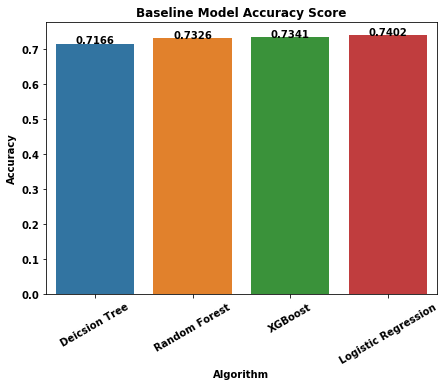

In [90]:
score = [accuracy_score(lr_pred, y_test),  accuracy_score(dt_pred, y_test), 
         accuracy_score(rf_pred, y_test), accuracy_score(xgb_pred, y_test)]
algorithm = ['Logistic Regression', 'Deicsion Tree', 'Random Forest', 'XGBoost']

pred_df = pd.DataFrame()
pred_df['Score'] = score
pred_df['Algorithm'] = algorithm
pred_df = pred_df.sort_values('Score')

plt.figure(figsize = (7, 5))
ax = sns.barplot(y = 'Score', x = 'Algorithm', data = pred_df, orient = 'v')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height,
            '{:1.4f}'.format(height),
            ha = 'center')

plt.title("Baseline Model Accuracy Score")
plt.xticks(rotation = 30)
plt.ylabel("Accuracy")
plt.show()

# k-Fold

Purpose of K-Fold Cross Validation
1. Model overfit check


2. Validate distribution differences between training data and test data 

In [98]:
for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = X_train[tr_idx], X_train[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

In [146]:
def KFold_Modeling(X, y, algorithm, k):
    kf = KFold(n_splits = k, random_state = 42)
    accuracy = []
    step = 1
    
    for tr_idx, val_idx in kf.split(X, y):
        print("*" * 30, "New Fold", "*" * 30)
        X_tr, X_val = X[tr_idx], X[val_idx]
        y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
        
        if algorithm == 'LogisticRegression':
            clf = LogisticRegression(random_state = 42) 
        elif algorithm == 'DecisionTree':
            # max_depth = 7: Manual Search
            clf = DecisionTreeClassifier(max_depth = 7,random_state = 42)
        elif algorithm == 'XGB':
            clf = XGBClassifier(max_depth = 6, random_state = 42)
        elif algorithm == 'RandomForest':
            clf = RandomForestClassifier(max_depth = 7, random_state = 42)
            
        if algorithm == 'XGB':
            clf.fit(X_tr, y_tr, eval_set = [(X_tr, y_tr), (X_val, y_val)],
                   early_stopping_rounds = 50, verbose = 10)
        else:
            clf.fit(X_tr, y_tr)
            
        pred = clf.predict(X_val)
        print("\n{}-Fold {} Accuracy Score: {}".format(step, algorithm, accuracy_score(pred, y_val)))
        
        accuracy.append(accuracy_score(pred, y_val))
        del X_tr, y_tr, X_val, y_val, clf
    
        step += 1
        if step == k:
            print("*" * 20, "End Validation", "*" * 20)
            
    print("\nMean Accuracy Score:, ", sum(accuracy) / k)

In [147]:
KFold_Modeling(X_train, y_train, algorithm = 'LogisticRegression', k = 5)

****************************** New Fold ******************************

1-Fold LogisticRegression Accuracy Score: 0.7423203858847424
****************************** New Fold ******************************

2-Fold LogisticRegression Accuracy Score: 0.7476516882457477
****************************** New Fold ******************************

3-Fold LogisticRegression Accuracy Score: 0.7331810104087332
****************************** New Fold ******************************

4-Fold LogisticRegression Accuracy Score: 0.7463179278821737
******************** End Validation ********************
****************************** New Fold ******************************

5-Fold LogisticRegression Accuracy Score: 0.7427628237684104

Mean Accuracy Score:,  0.7424467672379614


In [148]:
KFold_Modeling(X_train, y_train, algorithm = 'DecisionTree', k = 5)

****************************** New Fold ******************************

1-Fold DecisionTree Accuracy Score: 0.722010662604722
****************************** New Fold ******************************

2-Fold DecisionTree Accuracy Score: 0.7293729372937293
****************************** New Fold ******************************

3-Fold DecisionTree Accuracy Score: 0.7062706270627063
****************************** New Fold ******************************

4-Fold DecisionTree Accuracy Score: 0.7282884713052311
******************** End Validation ********************
****************************** New Fold ******************************

5-Fold DecisionTree Accuracy Score: 0.7133062468257999

Mean Accuracy Score:,  0.7198497890184378


In [149]:
KFold_Modeling(X_train, y_train, algorithm = 'RandomForest', k = 5)

****************************** New Fold ******************************

1-Fold RandomForest Accuracy Score: 0.7311500380807312
****************************** New Fold ******************************

2-Fold RandomForest Accuracy Score: 0.7397816704747397
****************************** New Fold ******************************

3-Fold RandomForest Accuracy Score: 0.7171871033257172
****************************** New Fold ******************************

4-Fold RandomForest Accuracy Score: 0.7356526155408837
******************** End Validation ********************
****************************** New Fold ******************************

5-Fold RandomForest Accuracy Score: 0.7425088877602845

Mean Accuracy Score:,  0.7332560630364713


In [150]:
KFold_Modeling(X_train, y_train, algorithm = 'XGB', k = 5)

****************************** New Fold ******************************
[0]	validation_0-error:0.252444	validation_1-error:0.283321
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[10]	validation_0-error:0.235305	validation_1-error:0.270119
[20]	validation_0-error:0.226355	validation_1-error:0.259457
[30]	validation_0-error:0.221721	validation_1-error:0.258441
[40]	validation_0-error:0.217532	validation_1-error:0.258187
[50]	validation_0-error:0.212581	validation_1-error:0.259457
[60]	validation_0-error:0.209534	validation_1-error:0.260472
[70]	validation_0-error:0.20471	validation_1-error:0.260218
[80]	validation_0-error:0.199568	validation_1-error:0.262249
Stopping. Best iteration:
[32]	validation_0-error:0.22096	validation_1-error:0.256156


1-Fold XGB Accuracy Score: 0.7438436151307438
****************************** New Fold ******************************
[0]	validation_0